In [ ]:
!pip install pickle-mixin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-py3-none-any.whl size=6006 sha256=49d9c5cb2799d311e1a427982ae996700e7ef93cfd00f8eb3d5e27383a607ef3
  Stored in directory: /root/.cache/pip/wheels/d0/70/0b/673e09a7ed429660d22352a1b117b4f616a8fc054bdd7eb157
Successfully built pickle-mixin


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('rand1000.csv')
#print(df)
coordinatesOfNodes = df.values.tolist()
#print(coordinatesOfNodes)
print(len(coordinatesOfNodes))

1000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


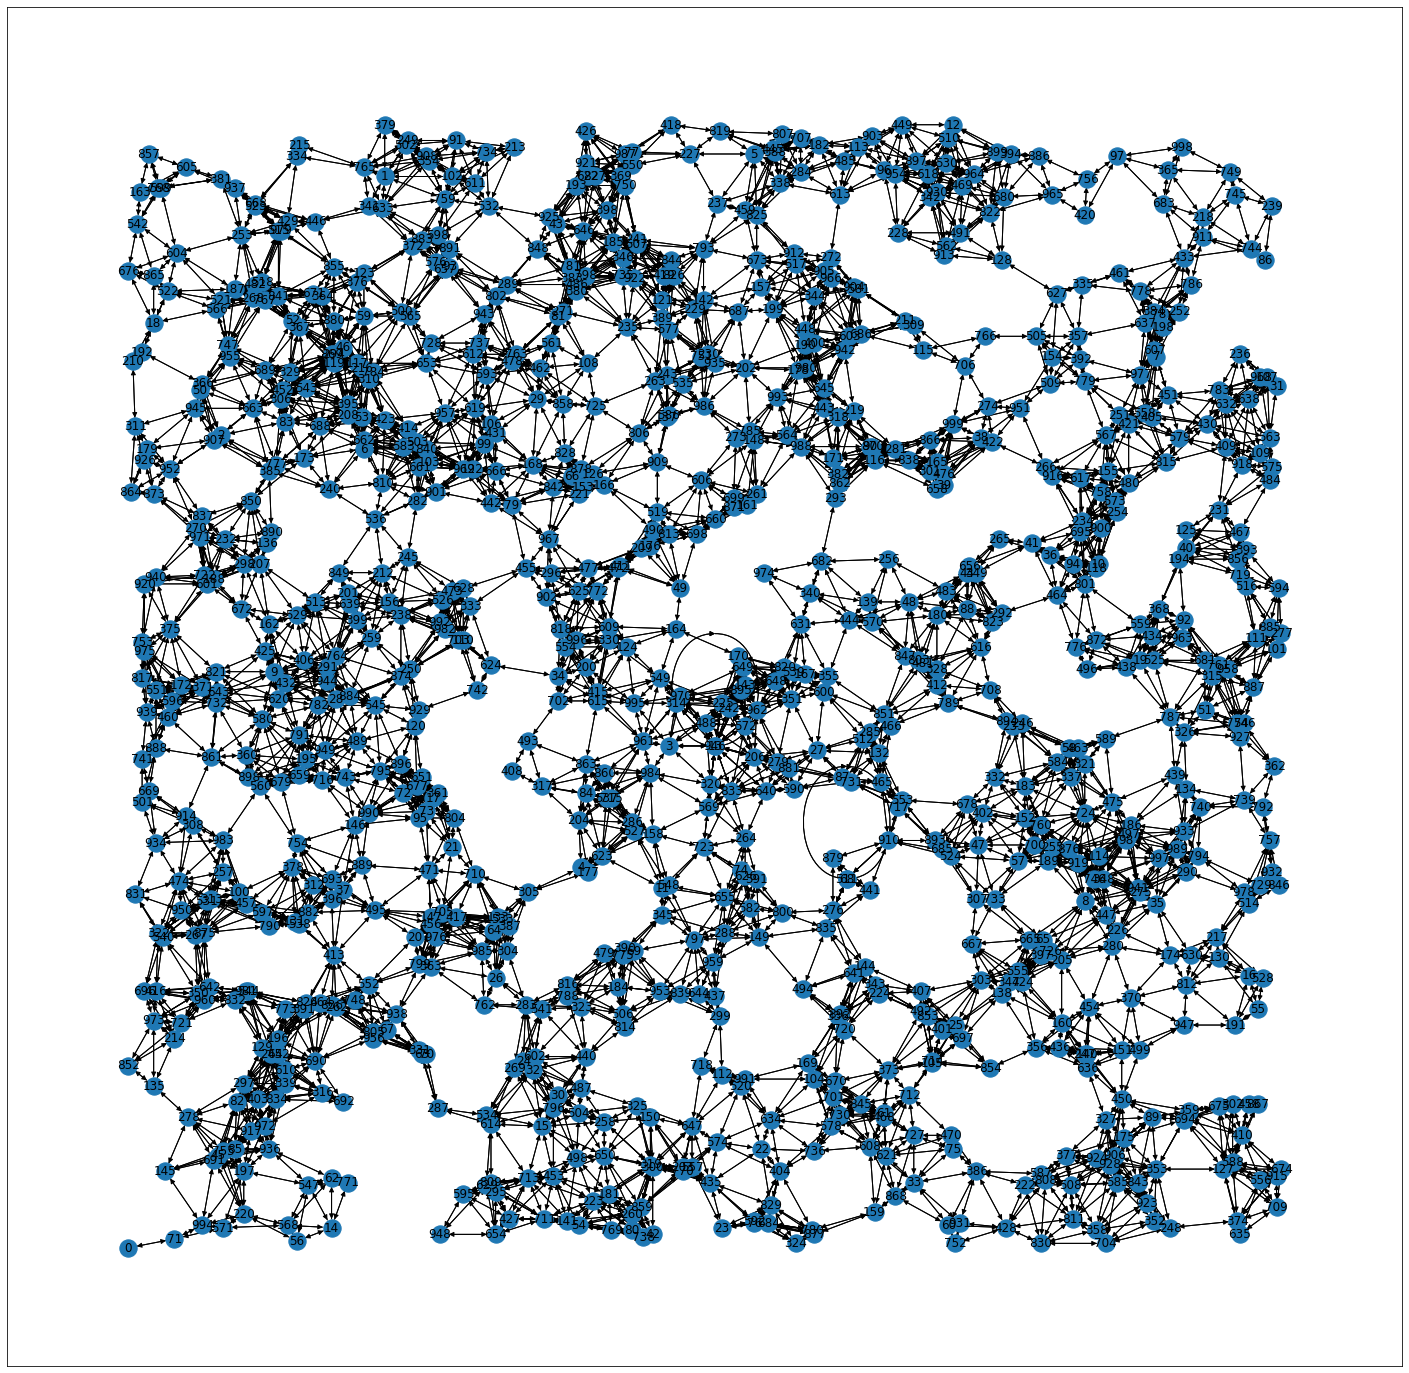

In [ ]:
import math, collections
import random
import numpy as np
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt

def dis(p, q):
    return math.sqrt((p[0] - q[0])**2 + (p[1] - q[1])**2)

def ei(neighbor, visited):
    res = 0
    for n in neighbor:
        if n in visited:
            res += len(visited[n])
        else:
            visited[n] = [tk for tk in Wireless_network.neighbors(n)]
            res += len(visited[n])
    return res


'''numberOfNodes = int(input('Number of Nodes to be deployed: '))
coordinatesOfNodes = np.array([[0, 0]])
for k in range(1, numberOfNodes):
    coordinatesOfNodes = np.append(coordinatesOfNodes, [[random.random(), random.random()]], axis = 0)

coordinatesOfNodes = 2000*coordinatesOfNodes
coordinatesOfNodes = coordinatesOfNodes.astype(int)
# coordinatesOfNodes = np.insert(coordinatesOfNodes, 0, [0,0], axis = 0)'''

pos = {}
for l in range(len(coordinatesOfNodes)):
    pos[l] = coordinatesOfNodes[l]

Wireless_network = nx.DiGraph()
Wireless_network.add_nodes_from(range(len(coordinatesOfNodes)))

for i in range(len(coordinatesOfNodes)):
    for j in range(len(coordinatesOfNodes)):
        if i != j:
            x = dis(coordinatesOfNodes[i], coordinatesOfNodes[j])
            if x <= 30:
                Wireless_network.add_edge(i, j, color='black')

# Finding Global Clustering Coefficient
'''clusCoeff = 0
visited = {}
for m in range(len(coordinatesOfNodes)):
    lis1 = collections.deque(Wireless_network.neighbors(m))
    numNeig = len(lis1)
    edgeBwNeig = ei(lis1, visited)
    dy = (0.5)*numNeig*(numNeig - 1)
    clusCoeff += (edgeBwNeig/dy)
print(f'Global Clustering Coefficient : {clusCoeff}')'''

nx.draw_networkx(Wireless_network, pos, with_labels = True)
plt.axes()

mpl.rcParams['figure.figsize'] = (25,25)
#plt.savefig('Real_field.eps')
#plt.savefig('Real_field.jpeg')

In [ ]:
def minDist(dis, visi):
    mini = float('inf')
    for v in range(len(coordinatesOfNodes)):
        if dis[v] < mini and visi[v] == False:
            mini = dis[v]
            mini_index = v
    return mini_index

def dijkstra(surc):
    dist = [float('inf')]*(len(coordinatesOfNodes))
    dist[surc] = 0
    visit = [False]*(len(coordinatesOfNodes))
    for temp in range(len(coordinatesOfNodes)):
        u = minDist(dist, visit)
        visit[u] = True
        for v in range(len(coordinatesOfNodes)):
            if ((adjLis[u][v] > 0) and (visit[v] == False) and (dist[v] > dist[u] + adjLis[u][v])):
                dist[v] = dist[u] + adjLis[u][v]
    return dist

In [ ]:
pathlis = []
adjMat = nx.adjacency_matrix(Wireless_network)
mat = adjMat.todense()
adjLis = mat.tolist()
for i in range(len(coordinatesOfNodes)):
    pathlis.append(dijkstra(i))

In [ ]:
# Creating adjacency matrix for Dijkstra's Algorithm
adjMat = nx.adjacency_matrix(Wireless_network)
mat = adjMat.todense()
adjLis = mat.tolist()

# Drawing Network
#nx.draw_networkx(Wireless_network, pos, with_labels = True)
#mpl.rcParams['figure.figsize'] = (50,50)

# Finding Numbers of edges between neighbors of Current node.
def ei(neighbor, adjLis):
    res = 0
    for i in neighbor:
        for j in neighbor:
          if adjLis[i][j] == 1:
            res += 1
    return res

# Dijkstra's Algorithm
def minDist(dis, visi):
    # Findes Next U in dijkstra's algorithm
    mini = float('inf')
    for v in range(len(coordinatesOfNodes)):
        if dis[v] < mini and visi[v] == False:
            mini = dis[v]
            mini_index = v
    return mini_index

def dijkstra(surc, lis):
    dist = [float('inf')]*(len(coordinatesOfNodes))
    dist[surc] = 0
    visit = [False]*(len(coordinatesOfNodes))
    for temp in range(len(coordinatesOfNodes)):
        u = minDist(dist, visit)
        visit[u] = True
        for v in range(len(coordinatesOfNodes)):
            if ((lis[u][v] > 0) and (visit[v] == False) and (dist[v] > dist[u] + lis[u][v])):
                dist[v] = dist[u] + lis[u][v]
    return dist

# Finding Global Clustering Coefficient
clusCoeff = 0
for m in range(len(coordinatesOfNodes)):
    lis1 = collections.deque(Wireless_network.neighbors(m))
    numNeig = len(lis1)
    edgeBwNeig = ei(lis1, adjLis)
    dy = numNeig*(numNeig - 1)
    if edgeBwNeig==0:
      clusCoeff+=0
    else:
      clusCoeff += (edgeBwNeig/dy)
# Prints Global Clustering Coefficient
print(f'Global Clustering Coefficient : {clusCoeff}')

# Finding Average Clustering Coefficient
numberOfNodes=len(coordinatesOfNodes)
ACC = clusCoeff/numberOfNodes
print(f'Average Clustering Coefficient : {ACC}')

# Applying Dijkstra's Algorithm for Number of Hops
pathlis = []
adjMat = nx.adjacency_matrix(Wireless_network)
mat = adjMat.todense()
adjLis = mat.tolist()
for i in range(len(coordinatesOfNodes)):
    pathlis.append(dijkstra(i,adjLis))

# Calculating Average Path Length
total_sum = 0
for i in range(len(coordinatesOfNodes)):
  curr_sum = sum(pathlis[i])
  total_sum += curr_sum
APL= total_sum/((len(coordinatesOfNodes)-1)*(len(coordinatesOfNodes)))
print(f'Average Path Length : {APL}')

# df = pd.DataFrame(data=pathlis)
#print(df)

Global Clustering Coefficient : 606.908487315918
Average Clustering Coefficient : 0.6069084873159181
Average Path Length : 11.834638638638639


In [ ]:
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.cluster import KMeans
pos_df = pd.DataFrame(data = pos)
res_df = pos_df.T
model = KMeans(n_clusters = 20)
model.fit(res_df)

KMeans(n_clusters=20)

In [ ]:
cluster_center = model.cluster_centers_
cluster_dist = {'center1':[], 'center2':[], 'dis':[]}
for i in range(len(cluster_center)):
  for j in range(i+1, len(cluster_center)):
    temp = dis(cluster_center[i], cluster_center[j])
    if 125 <= temp <= 200:
      cluster_dist['center1'].append(i+1)
      cluster_dist['center2'].append(j+1)
      cluster_dist['dis'].append(temp)
center_repr = pd.DataFrame(cluster_dist)
#center_repr

In [ ]:
# save the model
import pickle
#pickle.dump(model, open("rand1000.pkl", "wb"))

# load the model
model = pickle.load(open("rand1000.pkl", "rb"))

In [ ]:
labels = model.predict(res_df)
label = {}
for i,ele in enumerate(labels):
  if ele in label:
    label[ele].append(i)
  else:
    label[ele] = [i]

# New Section

In [ ]:
res_lis = []
for i in range(20):
  res_lis.append(res_df.iloc[label[i]])

30


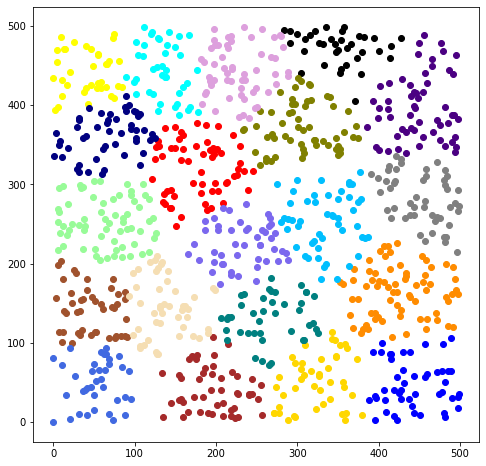

<Figure size 576x576 with 0 Axes>

In [ ]:
colors = ['black', 'brown', 'red', 'sienna', 'darkorange', 'gold', 'wheat', 'yellow', 'olive', 'palegreen', 'grey', 'aqua', 'teal', 'deepskyblue',
         'royalblue', 'blue', 'navy', 'mediumslateblue', 'indigo', 'plum', 'purple', 'magenta', 'seagreen', 'greenyellow', 'rosybrown', 'crimson', 'tomato','maroon', 'darkkhaki','steelblue']
print(len(colors))
for i in range(20):
  temp = colors[i]
  
  plt.scatter(res_lis[i][0], res_lis[i][1], color = temp)
plt.show()
mpl.rcParams['figure.figsize'] = (8,8)
plt.savefig('realNet_clus.eps')
plt.savefig('realNet_clus.jpeg')

In [ ]:
def collabrative(c1, c2, network, label):
    for i in label[c1]:
        for j in label[c2]:
            network.add_edge(i, j, color='r')

In [ ]:
check_small_world = {'center_from':[], 'center_to':[], 'small_world':[],
                     'clusCoeff':[], 'SW_ACC':[], 'SW_APL':[], 'L':[], 'C':[]}

In [ ]:
#for center1, center2 in zip(cluster_dist['center2'], cluster_dist['center1']):
for center1, center2 in zip(cluster_dist['center1'], cluster_dist['center2']):
  temp_network = Wireless_network.copy()
  collabrative(center1-1, center2-1, temp_network, label)

  check_small_world['center_from'].append(center1)
  check_small_world['center_to'].append(center2)

  # Finding Global Clustering Coefficient
  clusCoeff = 0
  for m in range(len(coordinatesOfNodes)):
      lis1 = collections.deque(temp_network.neighbors(m))
      numNeig = len(lis1)
      edgeBwNeig = ei(lis1, adjLis)
      dy = numNeig*(numNeig - 1)
      if edgeBwNeig==0:
        clusCoeff+=0
      else:
        clusCoeff += (edgeBwNeig/dy)
  # Prints Global Clustering Coefficient
  check_small_world['clusCoeff'].append(clusCoeff)

  # Finding Average Clustering Coefficient
  SW_ACC = clusCoeff/numberOfNodes
  check_small_world['SW_ACC'].append(SW_ACC)

  # Applying Dijkstra's Algorithm for Number of Hops
  pathlis = []
  adjMat = nx.adjacency_matrix(temp_network)
  mat = adjMat.todense()
  adjLis = mat.tolist()
  for i in range(len(coordinatesOfNodes)):
      pathlis.append(dijkstra(i,adjLis))

  # Calculating Average Path Length
  total_sum = 0
  for i in range(len(coordinatesOfNodes)):
    curr_sum = sum(pathlis[i])
    total_sum += curr_sum
  SW_APL = total_sum/((len(coordinatesOfNodes)-1)*(len(coordinatesOfNodes)))
  check_small_world['SW_APL'].append(SW_APL)
  L=SW_APL/APL
  check_small_world['L'].append(L)
  C=SW_ACC/ACC
  check_small_world['C'].append(C)
  S=C/L
  check_small_world['small_world'].append(S)

In [ ]:
df_small = pd.DataFrame(check_small_world)
df_small.to_csv('rand1000BF_Data1.csv')

In [ ]:
collabrative(13, 17, Wireless_network, label)

In [ ]:
collabrative(3, 4, Wireless_network, label)

In [ ]:
collabrative(1, 2, Wireless_network, label)


In [ ]:
collabrative(10, 12, Wireless_network, label)

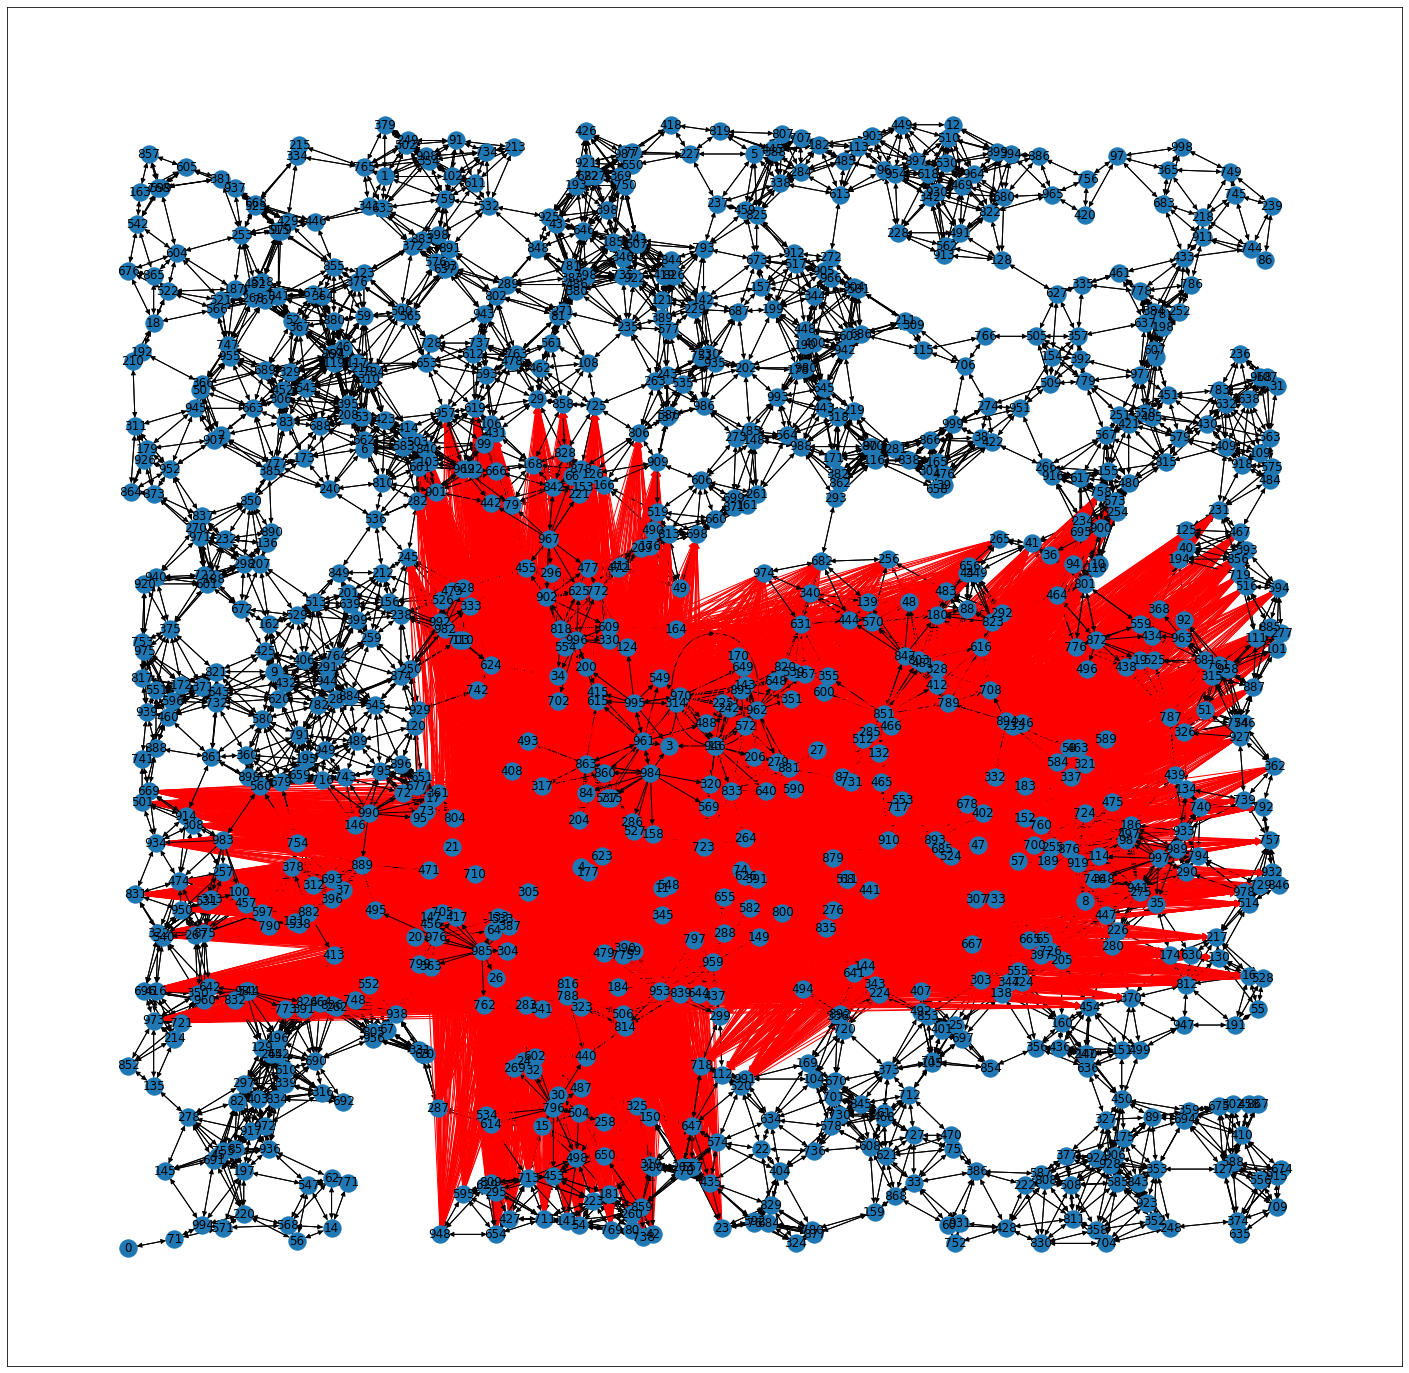

In [ ]:
edges = Wireless_network.edges()
colors = [Wireless_network[u][v]['color'] for u,v in edges]
nx.draw_networkx(Wireless_network, pos, with_labels = True, edge_color=colors)
mpl.rcParams['figure.figsize'] = (25,25)
#plt.savefig('realNet_BF.eps')
#plt.savefig('realNet_BF.jpeg')

In [ ]:
# Finding Global Clustering Coefficient
clusCoeff = 0
for m in range(len(coordinatesOfNodes)):
    lis1 = collections.deque(Wireless_network.neighbors(m))
    numNeig = len(lis1)
    edgeBwNeig = ei(lis1, adjLis)
    dy = numNeig*(numNeig - 1)
    if edgeBwNeig==0:
        clusCoeff+=0
    else:
        clusCoeff += (edgeBwNeig/dy)
# Prints Global Clustering Coefficient
print(f' SW Global Clustering Coefficient : {clusCoeff}')

# Finding Average Clustering Coefficient
SW_ACC = clusCoeff/numberOfNodes
print(f' SW Average Clustering Coefficient : {SW_ACC}')

# Applying Dijkstra's Algorithm for Number of Hops
pathlis = []
adjMat = nx.adjacency_matrix(Wireless_network)
mat = adjMat.todense()
adjLis = mat.tolist()
for i in range(len(coordinatesOfNodes)):
    pathlis.append(dijkstra(i,adjLis))

# Calculating Average Path Length
total_sum = 0
for i in range(len(coordinatesOfNodes)):
  curr_sum = sum(pathlis[i])
  total_sum += curr_sum
SW_APL = total_sum/((len(coordinatesOfNodes)-1)*(len(coordinatesOfNodes)))
print(f'SW Average Path Length : {SW_APL}')

df = pd.DataFrame(data=pathlis)
#print(df)

 SW Global Clustering Coefficient : 537.2364773424044
 SW Average Clustering Coefficient : 0.5372364773424044
SW Average Path Length : 8.347464464464464


In [ ]:
L=SW_APL/APL;
C=SW_ACC/ACC;
S=C/L;
if S>1:
  print(f'network is Small World, with S= {S}')
else:
     print('network is not a Small World')

network is Small World, with S= 1.2549970488169768
